#  ML Model Comparison
This notebook trains multiple ML algorithms and compares their performance on precision, recall, F1-score, and accuracy.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Load Dataset
df = pd.read_csv('behavior_based_intranet_attack_data.csv')
print('Dataset Loaded Successfully')
print('Shape:', df.shape)
print(df.head())

Dataset Loaded Successfully ✅
Shape: (342, 11)
   Login_Frequency  Failed_Login_Attempts  Data_Transferred_MB  \
0        37.454012                      6           104.535810   
1        95.071431                      0           270.723987   
2        73.199394                      3           347.892200   
3        59.865848                      3           114.275011   
4        15.601864                      4            87.477464   

   Session_Duration_Minutes  Accessed_Files  Password_Changes  \
0                  3.314013              49                 0   
1                 69.463787              44                 3   
2                 52.616895              10                 0   
3                 80.643136              28                 0   
4                 39.378320              35                 4   

   IP_Location_Changes  normal_Detections  Suspicious_URL_Clicks  \
0                    0                  1                      0   
1                    4       

In [2]:
# Data Preprocessing
X = df[['Login_Frequency', 'Failed_Login_Attempts', 'Data_Transferred_MB',
        'Session_Duration_Minutes', 'Accessed_Files', 'Password_Changes',
        'IP_Location_Changes', 'normal_Detections', 'Suspicious_URL_Clicks',
        'Time_Since_Last_Login_Hours']]
y = df['Attack_Type']

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [3]:
# Model Training & Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1})

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.376812   0.380280  0.376812  0.374751
1        Decision Tree  1.000000   1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3                  KNN  0.565217   0.589202  0.565217  0.569848
4                  SVM  0.840580   0.842655  0.840580  0.839853
5              XGBoost  1.000000   1.000000  1.000000  1.000000


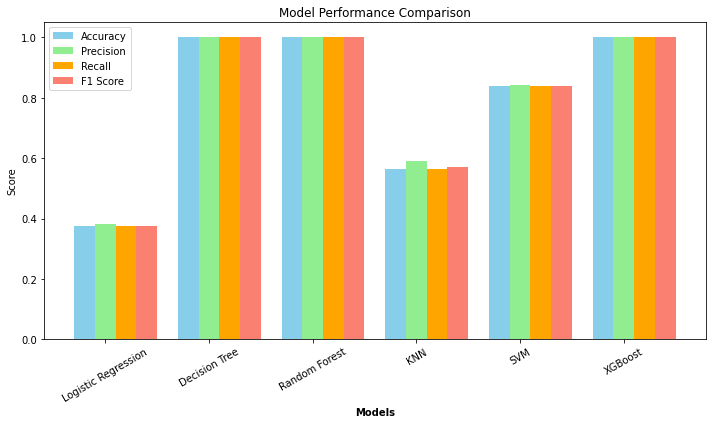

In [4]:
# Visualization
plt.figure(figsize=(10,6))
bar_width = 0.2
r1 = np.arange(len(results_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, results_df['Accuracy'], color='skyblue', width=bar_width, label='Accuracy')
plt.bar(r2, results_df['Precision'], color='lightgreen', width=bar_width, label='Precision')
plt.bar(r3, results_df['Recall'], color='orange', width=bar_width, label='Recall')
plt.bar(r4, results_df['F1 Score'], color='salmon', width=bar_width, label='F1 Score')

plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(results_df))], results_df['Model'], rotation=30)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()